<a href="https://colab.research.google.com/github/ctt2136/Python-for-finance/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [2]:
# install mplfinance
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 3.2 MB/s eta 0:00:00


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpl

# Check files on disk
* Go to https://www.kaggle.com/datasets/adhoppin/financial-data?resource=download and download the data.
* Extract the data in your folder, or updload it on Google Colab.
    * You can directly upload a 'zip' file on Google Drive.
    * Then, you'll have to mount google drive, find the correct folder and unzip the file
    * You can achieve this by  adapting the following code

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Mount your google drive
from google.colab import drive
drive.mount('/content/drive')
!ls


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
drive  sample_data


In [6]:
!unzip drive/MyDrive/archive.zip

unzip:  cannot find or open drive/MyDrive/archive.zip, drive/MyDrive/archive.zip.zip or drive/MyDrive/archive.zip.ZIP.


In [7]:
import os
dirpath='./drive/MyDrive/Financial_Data/stocks'
for dirname, _, filenames in os.walk(dirpath): # for each directory in current folder (./)+path
    for filename in filenames: # for each file in a directory
        print(os.path.join(dirname, filename)) # print the directory/filename

./drive/MyDrive/Financial_Data/stocks/SBUX.csv
./drive/MyDrive/Financial_Data/stocks/MSFT.csv
./drive/MyDrive/Financial_Data/stocks/PEP.csv
./drive/MyDrive/Financial_Data/stocks/QCOM.csv
./drive/MyDrive/Financial_Data/stocks/PYPL.csv
./drive/MyDrive/Financial_Data/stocks/TSLA.csv
./drive/MyDrive/Financial_Data/stocks/AMZN.csv
./drive/MyDrive/Financial_Data/stocks/ADBE.csv
./drive/MyDrive/Financial_Data/stocks/NFLX.csv
./drive/MyDrive/Financial_Data/stocks/GILD.csv
./drive/MyDrive/Financial_Data/stocks/GOOGL.csv
./drive/MyDrive/Financial_Data/stocks/AMGN.csv
./drive/MyDrive/Financial_Data/stocks/AMD.csv
./drive/MyDrive/Financial_Data/stocks/AAPL.csv
./drive/MyDrive/Financial_Data/stocks/CMCSA.csv
./drive/MyDrive/Financial_Data/stocks/NVDA.csv
./drive/MyDrive/Financial_Data/stocks/CSCO.csv
./drive/MyDrive/Financial_Data/stocks/INTC.csv
./drive/MyDrive/Financial_Data/stocks/GOOG.csv
./drive/MyDrive/Financial_Data/stocks/META.csv


# Open a file as a pandas dataframe

Pandas is very well documented, check here for a complete User Guide :

https://pandas.pydata.org/docs/user_guide/index.html

* Choose one stock file and open it as a DataFrame using the method pd.read_csv(filepath)

In [8]:
pd.read_csv(dirpath+"/META.csv")

,Date,Open,High,Low,Close,Volume,Symbol,YTD Gains
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,573576400,META,0.000000
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,168192700,META,-0.109861
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,101786600,META,-0.189118
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,73600000,META,-0.162961
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,50237200,META,-0.136019
...,...,...,...,...,...,...,...,...
2778,2023-06-05,270.299988,275.570007,269.559998,271.390015,20742900,META,6.098876
2779,2023-06-06,270.140015,276.570007,269.690002,271.119995,19419000,META,6.091813
2780,2023-06-07,271.670013,274.250000,262.799988,263.600006,26163600,META,5.895109
2781,2023-06-08,260.619995,267.649994,258.880005,264.579987,20899400,META,5.920743


# Set up the Dataframe

* convert values in the 'Date' column using pd.to_datetime(dfcolumn)
* set the date as index using df.set_index(column, inplace = True)
* check the first few lines of the dataframe using head()
* what happens if you type 'print(df[(df.index.day==1) & (df.index.month==9)]). Why ?

In [9]:
df= pd.read_csv(dirpath+"/META.csv")
pd.to_datetime(df['Date'])

,Date
0,2012-05-18
1,2012-05-21
2,2012-05-22
3,2012-05-23
4,2012-05-24
...,...
2778,2023-06-05
2779,2023-06-06
2780,2023-06-07
2781,2023-06-08


In [10]:
df.set_index("Date", inplace=True)

In [11]:
df.head()

,Open,High,Low,Close,Volume,Symbol,YTD Gains
Date,,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,573576400,META,0.000000
2012-05-21,36.529999,36.660000,33.000000,34.029999,168192700,META,-0.109861
2012-05-22,32.610001,33.590000,30.940001,31.000000,101786600,META,-0.189118
2012-05-23,31.370001,32.500000,31.360001,32.000000,73600000,META,-0.162961
2012-05-24,32.950001,33.209999,31.770000,33.029999,50237200,META,-0.136019


# Plot the closing price
You will start using PyPlot here, the most wellknown plotting library for Python.

Have a look here for a few examples :

https://matplotlib.org/stable/tutorials/pyplot.html

* Use df.plot(y = ..., use_index = True) to visualize the closing price
* Use 'plt' and 'sns' functions to improve your figure
    * Define a size for the figure with plt.figure(figsize = (w,h)), unit is inches (typically (12,8))
    * Use df.plot(y = ..., use_index = True) to visualize the closing price
    * set a title with plt.title
    * set labels with plt.xlabel and plt.ylabel
    * set a sns style with sns.set_style(...), options are 'white', 'whitegrid', 'dark', 'darkgrid'
    * show the plot with plt.show()

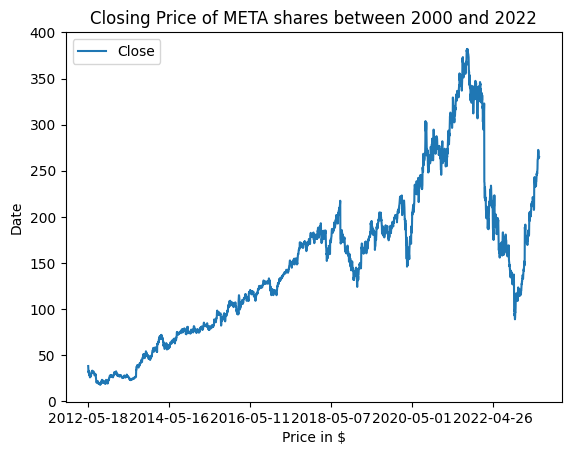

In [12]:
df.plot(y='Close',use_index=True)
plt.title('Closing Price of META shares between 2000 and 2022')
plt.xlabel('Price in $')
plt.ylabel('Date')
sns.set_style('dark')
plt.show()

# Daily returns
* Let's add a column to our dataset with daily returns
    * For that, you can apply the function pct_change() to the 'Close' column
    * Check the result using df.head()

In [13]:
# Add a column with daily returns
df["Daily_Returns"] = df["Close"].pct_change()

# Check the result
print(df.head())

                 Open       High        Low      Close     Volume Symbol  \
Date                                                                       
2012-05-18  42.049999  45.000000  38.000000  38.230000  573576400   META   
2012-05-21  36.529999  36.660000  33.000000  34.029999  168192700   META   
2012-05-22  32.610001  33.590000  30.940001  31.000000  101786600   META   
2012-05-23  31.370001  32.500000  31.360001  32.000000   73600000   META   
2012-05-24  32.950001  33.209999  31.770000  33.029999   50237200   META   

            YTD Gains  Daily_Returns  
Date                                  
2012-05-18   0.000000            NaN  
2012-05-21  -0.109861      -0.109861  
2012-05-22  -0.189118      -0.089039  
2012-05-23  -0.162961       0.032258  
2012-05-24  -0.136019       0.032187  


# Plotting daily returns

You will use Seaborn for that plot. Seaborn is a high-level and quite intuitive library.

Check the following link for several plot examples :

https://seaborn.pydata.org/tutorial/introduction.html

* Plot the histogram of daily returns in order to check the distribution
    * This can be done using sns.histplot(..., bins=..., kde=[True/False]). You can vary the bins number and try with or without kde.
    * Don't forget that the first value is a NaN (not a number), you can discard it using df['Your_column'].dropna()
    * You can remove axis if it looks more beautiful to you using sns.despine(left = True). This will remove the top, right (default) and left axis.

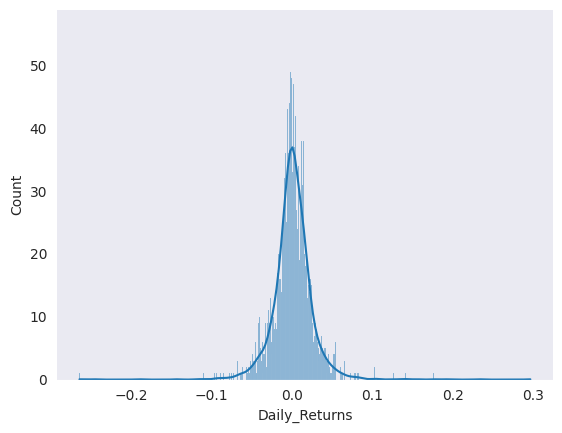

In [14]:
sns.histplot(df['Daily_Returns'].dropna(), bins=1000, kde=True)
sns.despine(left=True)

# Candlestick charts
Matplotlib also contains a library specialized for Finance, called mplfinance

Have a look here for a list of tutorials :

https://github.com/matplotlib/mplfinance#tutorials

* A bit of preprocessing is needed on the dataframe
    * First, filter the dataframe to only keep data from 2022 or after. In other words, you want all the rows for which df.index.year>2021. Store that in a new dataframe.
    * Then, compute a monthly mean by applying the functions resample(...) and mean() to your new dataframe. Again, store that in a new dataframe.
* Visualize the candlestick plot with mplfinance
    * Import the correct library (mplfinance, usually loaded as mpf)
    * Plot using mpf.plot(..., type = 'candle', style = '...', volume = [True|False])
    * Try different styles, different options and see the impact on the figure

In [15]:
df.index = pd.to_datetime(df.index)

/tmp/ipython-input-4247758287.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  resampled = df2[['Open', 'High', 'Low', 'Close', 'Volume']].resample('M').mean()


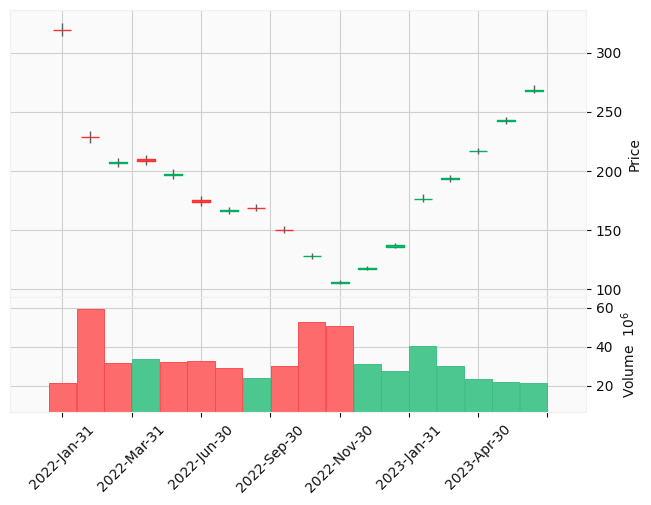

In [24]:
df2 = df[df.index.year > 2021]
resampled = df2[['Open', 'High', 'Low', 'Close', 'Volume']].resample('M').mean()

mpl.plot(resampled, type='candle', style='yahoo', volume=True)